In [2]:
## Classification of COVID patient chest xray using CNN 

### Importing library 
import numpy as np

import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
from tensorflow import keras
from tensorflow.keras import layers
from sklearn .preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from sklearn.metrics import classification_report,confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#### Importing dataset from google drive.....
DATASET_DIR = "/content/drive/My Drive/dataset"

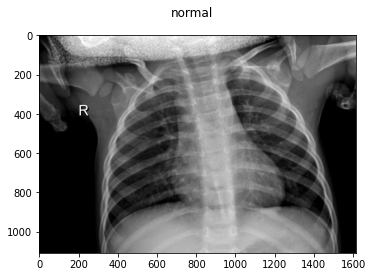

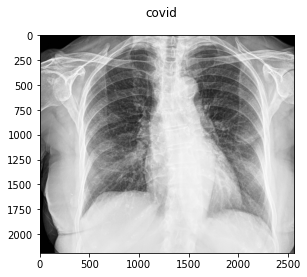

In [4]:
### Reading the image from dataset to making an array ....and present one imgae
## for each Normal OR Covid....

normal_images = []
for img_path in glob.glob(DATASET_DIR + '/normal/*'):
    normal_images.append(mpimg.imread(img_path))
        
fig = plt.figure()
fig.suptitle('normal')
plt.imshow(normal_images[0], cmap='gray') 

covid_images = []
for img_path in glob.glob(DATASET_DIR + '/covid/*'):
    covid_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('covid')
plt.imshow(covid_images[0], cmap='gray') 

In [0]:
### Scaling the image file or preprocessing the image 

IMG_W = 150
IMG_H = 150
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 20
BATCH_SIZE = 6

In [6]:
### CNN convolutional neural netwrok step by step .....

model = Sequential()
model.add(Conv2D(32 , (3,3) , padding = 'same' , strides = 1 , activation = 'relu' , input_shape = INPUT_SHAPE))
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , padding = 'same' , strides = 1 , activation = 'relu'))
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , padding = 'same' , strides = 1 , activation = 'relu'))
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , padding = 'same' , strides = 1 , activation = 'relu'))
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , padding = 'same' , strides = 1 , activation = 'relu'))
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 64 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop' , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 38, 38, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 19, 19, 128)      

In [7]:
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        rescale = 1./255,
        validation_split = 0.3) 
train_generator = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')
validation_generator = datagen.flow_from_directory(
    DATASET_DIR, 
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= False,
    subset='validation')
history = model.fit(train_generator,validation_data = validation_generator,epochs = EPOCHS)

Found 69 images belonging to 2 classes.
Found 29 images belonging to 2 classes.
Epoch 1/20
12/12 [==============================] - 7s 588ms/step - loss: 0.7877 - accuracy: 0.6377 - val_loss: 0.7789 - val_accuracy: 0.7241
Epoch 2/20
12/12 [==============================] - 6s 524ms/step - loss: 0.6657 - accuracy: 0.6377 - val_loss: 1.1016 - val_accuracy: 0.7241
Epoch 3/20
12/12 [==============================] - 6s 533ms/step - loss: 0.3108 - accuracy: 0.8261 - val_loss: 1.5552 - val_accuracy: 0.7586
Epoch 4/20
12/12 [==============================] - 6s 540ms/step - loss: 0.4081 - accuracy: 0.8261 - val_loss: 2.4057 - val_accuracy: 0.7586
Epoch 5/20
12/12 [==============================] - 6s 537ms/step - loss: 0.3730 - accuracy: 0.8841 - val_loss: 1.9754 - val_accuracy: 0.8276
Epoch 6/20
12/12 [==============================] - 6s 532ms/step - loss: 0.2733 - accuracy: 0.8986 - val_loss: 0.6799 - val_accuracy: 0.8966
Epoch 7/20
12/12 [==============================] - 7s 547ms/step - 

In [8]:
### Overall accuracy of model is.....

print("Training Accuracy of the model is - " , model.evaluate(train_generator)[1]*100 , "%")
print("Validation Accuracy of the model is - " , model.evaluate(validation_generator)[1]*100 , "%")

12/12 [==============================] - 3s 273ms/step
Training Accuracy of the model is -  100.0 %
5/5 [==============================] - 2s 309ms/step
Validation Accuracy of the model is -  96.55172228813171 %


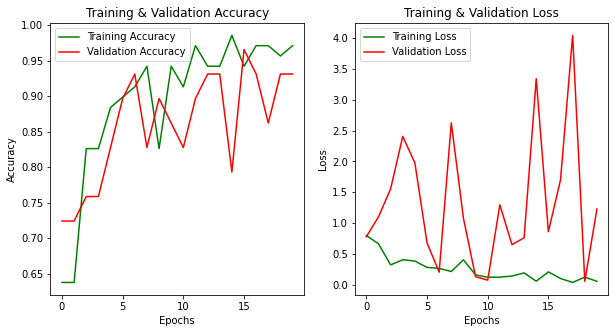

In [9]:
### GRaphical representation of the result on each epoch....
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']
fig.set_size_inches(10,5)

ax[0].plot(epochs , train_acc , 'g' , label = 'Training Accuracy')
ax[0].plot(epochs , test_acc , 'r' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g' , label = 'Training Loss')
ax[1].plot(epochs , test_loss , 'r' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()


In [10]:
### Classsification report 

true_class = validation_generator.classes
pred_class = model.predict(validation_generator)
pred_class = np.around(pred_class , decimals = 0)
print(classification_report(true_class, pred_class, target_names = ['0','1']))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      0.75      0.86         8

    accuracy                           0.93        29
   macro avg       0.96      0.88      0.91        29
weighted avg       0.94      0.93      0.93        29



In [11]:
### 
pred= model.predict(validation_generator)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (validation_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]
print(predicted_class_indices)
print (labels)
print (predictions)
# Save the model
model.save('path_to_my_model.h5')


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
{'covid': 0, 'normal': 1}
['covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid']


Normal


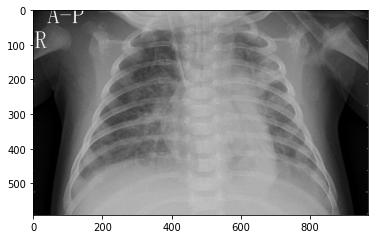

In [13]:
# Recreate the exact same model purely from the file
#new_model = keras.models.load_model('path_to_my_model.h5')


from keras.models import load_model

import cv2

import numpy as np

model = load_model('path_to_my_model.h5')

model.compile(loss='binary_crossentropy',

              optimizer='rmsprop',

              metrics=['accuracy'])

img = cv2.imread('/content/drive/My Drive/person1946_bacteria_4874.jpeg')
plt.imshow(img, cmap='gray')
img = cv2.resize(img,(150,150))

img = np.reshape(img,[1,150,150,3])

classes = model.predict_classes(img)

if classes==[0]:
  print("Covid")
 
else:  
  print("Normal") 
  
 




